In [1]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

from libs.utils import montage
from libs import gif

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
'''
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) 
X_test = X_test.astype(np.float32).reshape(-1, 28*28) 
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
'''
from libs.datasets import MNIST
ds = MNIST()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
ds.X.shape

(70000, 784)

In [4]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

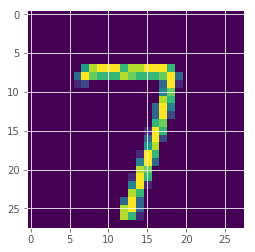

In [5]:
plt.imshow(ds.X[1].reshape((28,28)))

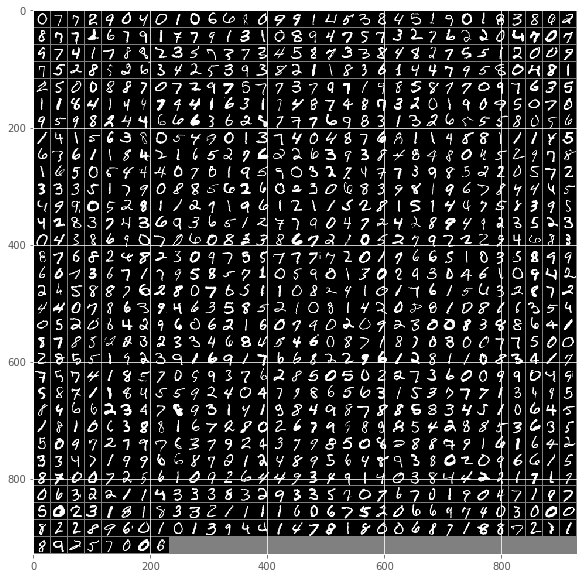

In [6]:
imgs = ds.X[:1000].reshape((-1,28,28))
plt.figure(figsize=(10,10))
plt.imshow(montage(imgs), cmap='gray')

In [7]:
mean_img = np.mean(ds.X, axis = 0)
std_img = np.std(ds.X, axis=0)

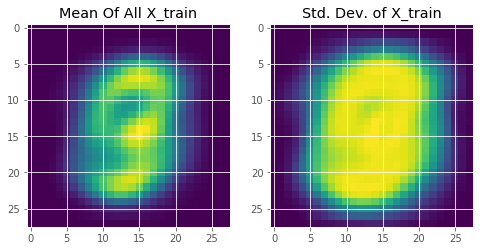

In [8]:
fig=plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(1, 2, 1) #add_subplot(rows, cols, increment)
ax1.title.set_text('Mean Of All X_train')
ax1 = plt.imshow(mean_img.reshape((28,28)))

ax2 = fig.add_subplot(1, 2, 2)
ax2.title.set_text('Std. Dev. of X_train')
plt.imshow(std_img.reshape((28,28)))

plt.show()

In [9]:
dimensions = [512,256,128,64]

In [10]:
n_features = ds.X.shape[1] # no of features
X = tf.placeholder(tf.float32, shape=[None, n_features])

In [11]:
# let's first copy our X placeholder to the name current_input
current_input = X
n_input = n_features

# Keep every matrix we create so let's create a list to hold them all
Ws = []

# Create a for loop to create each layer:
for layer_i, n_output in enumerate(dimensions):

    # just like in the last session,
    # Use a variable scope to help encapsulate our variables
    # This will simply prefix all the variables made in this scope
    # with the name we give it.
    with tf.variable_scope("encoder/layer/{}".format(layer_i)):

        # Create a weight matrix which will increasingly reduce
        # down the amount of information in the input by performing
        # a matrix multiplication
        W = tf.get_variable( name='W', shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02))

        # Now multiply our input by our newly created W matrix
        # and add the bias
        h = tf.matmul(current_input, W)

        # relu activation function on its output
        current_input = tf.nn.relu(h)

        # Store the weight matrix so we can build the decoder.
        Ws.append(W)

        # Replace n_input with the current n_output, so that on the
        # next iteration, our new number inputs will be correct.
        n_input = n_output

In [12]:
print(current_input.shape)

(?, 64)


In [13]:
Ws = Ws[::-1]
dimensions = dimensions[::-1][1:] + [ds.X.shape[1]]
print(dimensions)

[128, 256, 512, 784]


In [14]:
for layer_i, n_output in enumerate(dimensions):
    # Use a variable scope again to help encapsulate our variables
    # This will simply prefix all the variables made in this scope
    # with the name we give it.
    with tf.variable_scope("decoder/layer/{}".format(layer_i)):

        # Now grab the weight matrix we created before and transpose it
        # So a 3072 x 784 matrix would become 784 x 3072
        # or a 256 x 64 matrix, would become 64 x 256
        W = tf.transpose(Ws[layer_i])

        # Multiply our input by our transposed W matrix
        h = tf.matmul(current_input, W)

        # relu activation function on its output
        current_input = tf.nn.relu(h)

        # We'll also replace n_input with the current n_output, so that on the
        # next iteration, our new number inputs will be correct.
        n_input = n_output

In [15]:
Y = current_input

In [16]:
cost = tf.reduce_mean(tf.squared_difference(X, Y), 1)
print(cost.get_shape())

(?,)


In [17]:
cost = tf.reduce_mean(cost)

In [18]:
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
batch_size = 100
n_epochs = 50
examples = ds.X[:100]
imgs = []

0 0.04156615
1 0.036685277
2 0.034838546
3 0.03209546
4 0.031241767
5 0.03096126
6 0.030821722
7 0.029026322
8 0.029129712
9 0.028719738
10 0.027993541
11 0.027968755
12 0.028480135
13 0.028123125
14 0.027723398
15 0.028185196
16 0.026309675
17 0.027116451
18 0.026766848
19 0.026473388
20 0.025881905
21 0.027222753
22 0.026275054
23 0.025785396
24 0.026203062
25 0.02610204
26 0.02672306
27 0.02685459
28 0.026625184
29 0.027422212
30 0.02594638
31 0.026040642
32 0.025597975
33 0.024960771
34 0.02561649
35 0.026366308
36 0.025675006
37 0.025986878
38 0.026280344
39 0.025567975
40 0.025571788
41 0.025441108
42 0.025281608
43 0.025897807
44 0.026273862
45 0.024670081
46 0.025457988
47 0.02540185
48 0.025756828
49 0.02438356


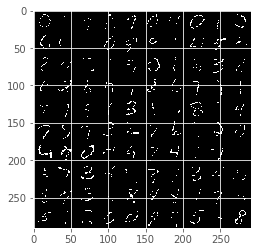

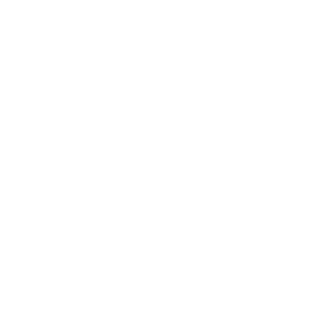

In [21]:
fig, ax = plt.subplots(1, 1)
for epoch_i in range(n_epochs):
    for batch_X, _ in ds.train.next_batch():
        sess.run(optimizer, feed_dict={X: batch_X - mean_img})
    recon = sess.run(Y, feed_dict={X: examples - mean_img})
    recon = np.clip((recon + mean_img).reshape((-1, 28, 28)), 0, 255)
    img_i = montage(recon).astype(np.uint8)
    imgs.append(img_i)
    ax.imshow(img_i, cmap='gray')
    fig.canvas.draw()
    print(epoch_i, sess.run(cost, feed_dict={X: batch_X - mean_img}))
gif.build_gif(imgs, saveto='ae.gif', cmap='gray')

In [22]:
import IPython.display as ipyd
ipyd.Image(url='ae.gif?{}'.format(np.random.rand()),
           height=500, width=500)